In [1]:
from encryptor import Encryptor
from vigenere_hacker import VigenereHacker, kasiski_method
from hasher import Hasher

In [2]:
from random import randint
def generate_key(length):
    return ''.join([chr(randint(ord('a'), ord('z'))) for _ in range(length)])

In [3]:
with open('rus_text.txt', 'r') as test:
    text = test.read()
print(text)

Небольшая тестовая строка для нашего метода Касиски.
Эту строку мы сначала зашифруем по методу Виженера, а потом попытаемся найти длину ключа, с помощью которого она была зашифрована.



In [5]:
encryptor = Encryptor("ант", lang='rus')
# for alphabet in encryptor.encrypting_table:
#     print(alphabet)
encrypted = encryptor.encrypt(text)
print(encrypted)

Нтуощошнс ачсабвнс яерьэа цлм ннкерб ъчтьца Эаяысшы.
Птб сагошё ън яааетлн знкивгутя эб ъчтьцу Фифчнтга, а воабм воэнтнчмяс ытйаы сюиыё шююет, д эбмьльл кьеоюбгь оыт онлн знкивгоптнн.



In [7]:
hasher = Hasher(encrypted)
lengths = kasiski_method(hasher, 3)
print(lengths.most_common(10))
hacker = VigenereHacker('rus')
for length, _ in filter(lambda x: 3 <= x[0] < len(encrypted), lengths.most_common(5)):
    for decrypted in hacker.hack(encrypted, length):
        if decrypted == text:
            print("code word length = {}".format(length))
            print(decrypted)
            break

[(1, 152), (3, 15), (2, 9), (6, 9), (4, 8), (12, 8), (8, 7), (16, 7), (24, 7), (32, 7)]
code word length = 3
Небольшая тестовая строка для нашего метода Касиски.
Эту строку мы сначала зашифруем по методу Виженера, а потом попытаемся найти длину ключа, с помощью которого она была зашифрована.

code word length = 6
Небольшая тестовая строка для нашего метода Касиски.
Эту строку мы сначала зашифруем по методу Виженера, а потом попытаемся найти длину ключа, с помощью которого она была зашифрована.



In [8]:
from collections import defaultdict

with open('text.txt', 'r') as test:
    text = test.read()
answers = defaultdict(lambda: defaultdict(int))
for _ in range(3):
    for key_length in range(4, 20, 2):
        key = generate_key(key_length)
        for i in range(10, 1000, 100):
            if i < key_length:
                answers[key_length][i] += 1
                continue
            print("trying with key length = {} and text length = {}".format(key_length, i))
            encryptor = Encryptor(key)
            encrypted = encryptor.encrypt(text[:i])
            hasher = Hasher(encrypted)
            l = 2 if i < 250 else 3 if i < 5000 else 5 if i < 20000 else 10
            lengths = kasiski_method(hasher, l)
            print(lengths)
            hacker = VigenereHacker()
            results = []
            for length, _ in filter(lambda x: 3 < x[0] < len(encrypted) // 2, lengths.most_common(7)):
                print(length)
                if length != key_length:
                    continue
                local_results = [decrypted == text[:i] for decrypted in hacker.hack(encrypted, length)]
                results.append(any(local_results))
                if results[-1]:
                    print("good length: {}!".format(length))
                    break
            answers[key_length][i] += 0 if any(results) else 1
            print(100 * "*")

trying with key length = 4 and text length = 10
Counter({1: 9})
****************************************************************************************************
trying with key length = 4 and text length = 110
Counter({1: 92, 2: 9, 4: 6, 7: 4, 8: 4, 3: 4, 5: 3, 10: 2, 14: 2, 28: 2, 56: 2, 16: 2, 32: 2, 64: 2, 6: 2, 9: 2, 25: 1, 50: 1, 18: 1, 27: 1, 54: 1, 12: 1, 11: 1, 49: 1, 15: 1, 45: 1})
4
good length: 4!
****************************************************************************************************
trying with key length = 4 and text length = 210
Counter({1: 138, 2: 39, 4: 27, 3: 14, 5: 12, 19: 10, 8: 10, 6: 10, 38: 9, 76: 9, 10: 9, 7: 6, 16: 6, 9: 6, 12: 6, 20: 6, 18: 5, 15: 4, 14: 3, 32: 3, 23: 3, 40: 3, 80: 3, 35: 2, 25: 2, 50: 2, 28: 2, 56: 2, 64: 2, 27: 2, 54: 2, 11: 2, 24: 2, 36: 2, 30: 2, 60: 2, 53: 2, 106: 2, 46: 2, 21: 1, 105: 1, 181: 1, 49: 1, 45: 1, 31: 1, 62: 1, 124: 1, 100: 1, 61: 1, 122: 1, 71: 1, 72: 1, 83: 1, 70: 1, 57: 1, 103: 1, 115: 1})
4
good length: 4!

good length: 6!
****************************************************************************************************
trying with key length = 8 and text length = 10
Counter({1: 9})
****************************************************************************************************
trying with key length = 8 and text length = 110
Counter({1: 93, 2: 9, 4: 5, 7: 4, 8: 4, 5: 2, 10: 2, 14: 2, 28: 2, 56: 2, 16: 2, 32: 2, 64: 2, 29: 1, 58: 1, 25: 1, 50: 1, 3: 1, 6: 1, 9: 1, 18: 1, 27: 1, 54: 1, 49: 1})
4
7
8
good length: 8!
****************************************************************************************************
trying with key length = 8 and text length = 210
Counter({1: 160, 2: 21, 4: 13, 8: 10, 5: 7, 10: 6, 16: 6, 3: 6, 6: 5, 7: 4, 20: 4, 32: 3, 9: 3, 18: 3, 12: 3, 40: 3, 80: 3, 14: 2, 28: 2, 56: 2, 64: 2, 61: 2, 122: 2, 11: 2, 24: 2, 29: 1, 58: 1, 25: 1, 50: 1, 27: 1, 54: 1, 83: 1, 166: 1, 49: 1, 109: 1, 15: 1, 30: 1, 60: 1, 53: 1, 13: 1, 143: 1, 36: 1, 72: 1, 23: 1, 115: 1, 19

****************************************************************************************************
trying with key length = 14 and text length = 210
Counter({1: 158, 2: 27, 3: 15, 4: 12, 6: 11, 9: 9, 18: 7, 5: 6, 8: 6, 7: 5, 14: 5, 10: 4, 13: 4, 26: 4, 12: 3, 25: 2, 50: 2, 28: 2, 56: 2, 27: 2, 39: 2, 78: 2, 17: 2, 51: 2, 24: 2, 36: 2, 72: 2, 19: 2, 38: 2, 76: 2, 20: 1, 40: 1, 100: 1, 200: 1, 16: 1, 32: 1, 64: 1, 54: 1, 49: 1, 98: 1, 21: 1, 42: 1, 153: 1, 37: 1, 111: 1, 61: 1, 122: 1, 15: 1, 30: 1, 45: 1, 90: 1, 52: 1, 81: 1, 11: 1, 55: 1})
4
6
9
18
****************************************************************************************************
trying with key length = 14 and text length = 310
Counter({1: 281, 2: 15, 4: 11, 8: 10, 7: 9, 14: 9, 16: 9, 28: 9, 56: 9, 112: 9, 3: 3, 6: 3, 9: 2, 18: 2, 23: 1, 46: 1, 92: 1, 184: 1, 13: 1, 26: 1, 39: 1, 78: 1, 117: 1, 234: 1, 5: 1, 10: 1, 25: 1, 50: 1, 37: 1, 74: 1, 111: 1, 222: 1, 19: 1, 38: 1, 76: 1})
4
8
7
14
16
***********************

KeyboardInterrupt: 

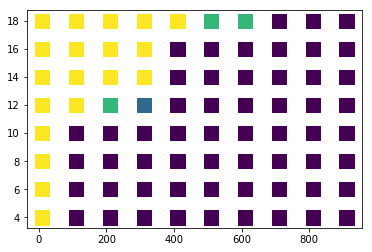

In [7]:
from matplotlib import pyplot as plt

x = []
y = []
c = []

for key_length, by_lengths in answers.items():
    for length, value in by_lengths.items():
        x.append(length)
        y.append(key_length)
        c.append(value)
        
plt.scatter(x=x, y=y, c=c, marker='s', s=200)
plt.show()